In [0]:
# mengimport packages yang diperlukan
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

import zipfile
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from google.colab import files

In [4]:
# menginput dataset
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-05-14 02:35:09--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  4.70MB/s    in 58s     

2020-05-14 02:36:08 (5.33 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [5]:
# mengekstrak dan membuat direktori file dataset
rps_zip = '/tmp/rockpaperscissors.zip' 
rps_zip_ref = zipfile.ZipFile(rps_zip, 'r') 
rps_zip_ref.extractall('/tmp') 
rps_zip_ref.close()

dir_rps = '/tmp/rockpaperscissors/rps-cv-images'
print(os.listdir(dir_rps))

['scissors', 'paper', 'rock', 'README_rpc-cv-images.txt']


In [6]:
# membuat direktori file gambar paper, rock, scissors dan menghitung jumlah gambar masing-masing
dir_paper = os.path.join(dir_rps, 'paper')
dir_rock = os.path.join(dir_rps, 'rock')
dir_scissors = os.path.join(dir_rps, 'scissors')

banyak_paper = len(os.listdir(dir_paper))
banyak_rock = len(os.listdir(dir_rock))
banyak_scissors = len(os.listdir(dir_scissors))
total_rps = banyak_paper + banyak_rock + banyak_scissors

print('banyak gambar paper:', banyak_paper)
print('banyak gambar rock:', banyak_rock)
print('banyak gambar scissors:', banyak_scissors)
print('---------------------------------+')
print('total gambar:', total_rps)

banyak gambar paper: 712
banyak gambar rock: 726
banyak gambar scissors: 750
---------------------------------+
total gambar: 2188


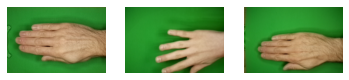

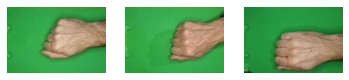

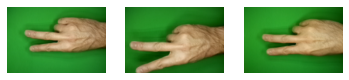

In [7]:
# menampilkan 3 contoh gambar paper, rock, scissors
contoh_rps = 3
for f in [dir_paper, dir_rock, dir_scissors]:
    for i in range(contoh_rps):
        cth_rps = plt.subplot(1, contoh_rps, i + 1)
        cth_rps.axis('Off')
        img = mpimg.imread(f + "/" + os.listdir(f)[i])
        plt.imshow(img)
    plt.show()

In [8]:
# menyiapkan gambar dengan ImageDataGenerator
rps_data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    validation_split=0.2)

rps_training_gen = rps_data_gen.flow_from_directory(
    dir_rps,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    subset='training')

rps_validation_gen = rps_data_gen.flow_from_directory(
    dir_rps,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


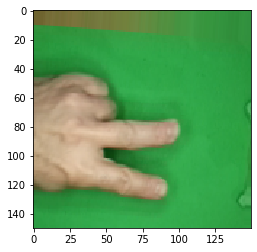

[0. 0. 1.]


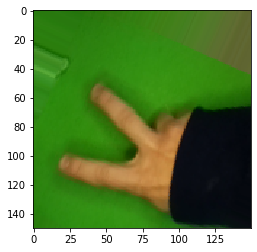

[0. 0. 1.]


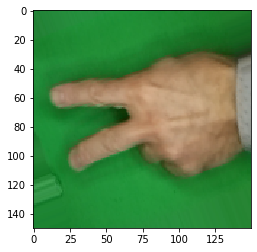

[0. 0. 1.]


In [9]:
# menampilkan hasil persiapan gambar 
a, b = rps_training_gen.next()
plt.imshow(a[0], interpolation='nearest')
plt.show()
print(b[0])

plt.imshow(a[1], interpolation='nearest')
plt.show()
print(b[1])

plt.imshow(a[2], interpolation='nearest')
plt.show()
print(b[2])

In [10]:
# membentuk model
model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
        MaxPooling2D(2,2),
        Dropout(0.2),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Dropout(0.1),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(3, activation='softmax')                
        ])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0

In [0]:
# menyusun model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [12]:
# melatih model
model_rps = model.fit_generator(
    rps_training_gen,
    steps_per_epoch=20,
    epochs=20,
    validation_data=rps_validation_gen,
    validation_steps=5,
    verbose=2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
20/20 - 34s - loss: 1.1048 - accuracy: 0.3562 - val_loss: 1.0865 - val_accuracy: 0.3375
Epoch 2/20
20/20 - 34s - loss: 0.9949 - accuracy: 0.5000 - val_loss: 0.9573 - val_accuracy: 0.5188
Epoch 3/20
20/20 - 33s - loss: 0.6847 - accuracy: 0.7528 - val_loss: 0.5492 - val_accuracy: 0.8054
Epoch 4/20
20/20 - 34s - loss: 0.5168 - accuracy: 0.8000 - val_loss: 0.5103 - val_accuracy: 0.8000
Epoch 5/20
20/20 - 33s - loss: 0.4099 - accuracy: 0.8562 - val_loss: 0.4699 - val_accuracy: 0.8188
Epoch 6/20
20/20 - 34s - loss: 0.4236 - accuracy: 0.8384 - val_loss: 0.3947 - val_accuracy: 0.8750
Epoch 7/20
20/20 - 34s - loss: 0.3037 - accuracy: 0.8938 - val_loss: 0.2541 - val_accuracy: 0.9000
Epoch 8/20
20/20 - 34s - loss: 0.3367 - accuracy: 0.8781 - val_loss: 0.3991 - val_accuracy: 0.8562
Epoch 9/20
20/20 - 33s - loss: 0.3284 - accuracy: 0.8811 - val_loss: 0.3028 - val_accuracy: 0.9125
Epoch 10/20
20/20 - 33s - loss: 0

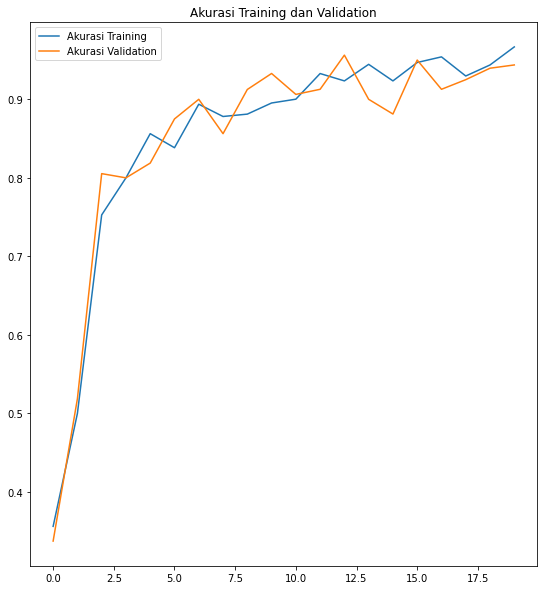

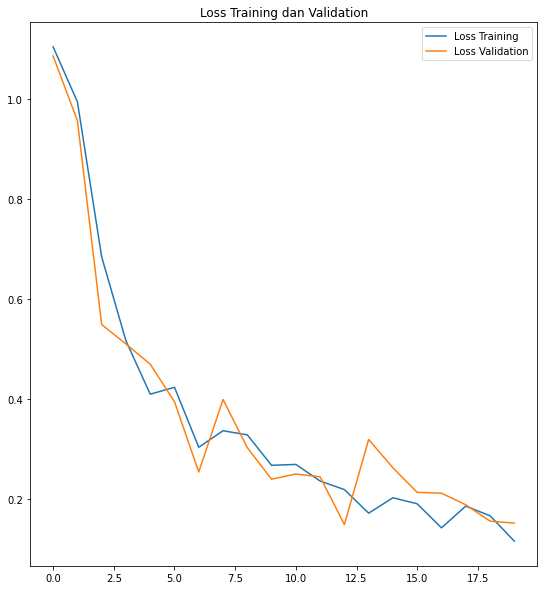

In [13]:
# menampilkan visualisasi grafik akurasi dan loss model
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(model_rps.history['accuracy'], label='Akurasi Training')
plt.plot(model_rps.history['val_accuracy'], label='Akurasi Validation')
plt.legend(loc='best')
plt.title('Akurasi Training dan Validation')

plt.figure(figsize=(20,10))
plt.subplot(1,2,2)
plt.plot(model_rps.history['loss'], label='Loss Training')
plt.plot(model_rps.history['val_loss'], label='Loss Validation')
plt.legend(loc='best')
plt.title('Loss Training dan Validation')

plt.show()

Saving 3UH9T0W1eZQW36xF.png to 3UH9T0W1eZQW36xF.png
3UH9T0W1eZQW36xF.png
SCISSORS!


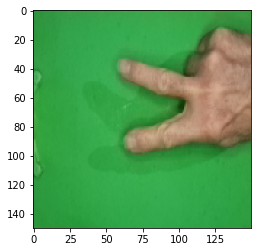

In [14]:
# memprediksi gambar
uploaded = files.upload()
for fn in uploaded.keys():
  path = fn
  img = image.load_img(path,target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  result = np.argmax(classes)

  print(fn)
  if result==0:
    print('PAPER!')
  elif result==1:
    print('ROCK!')
  else:
    print('SCISSORS!')